In [1]:
import pandas as pd
import seaborn as sns

In [7]:
tips=pd.read_csv('R:/datasets/tips.csv')

In [6]:
tips=sns.load_dataset('tips')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


How many weekdays are present in the dataset

In [10]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

last 5 rows

In [12]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


 how many dinners and lunches are present

In [15]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## let's polts

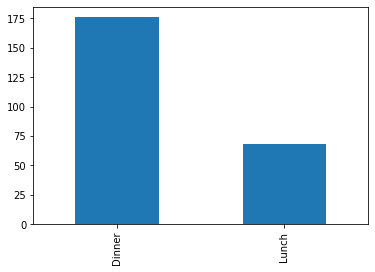

In [19]:
tips.time.value_counts().plot(kind='bar')

### what is the proportion of the dinner and lunches in %


In [22]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

### when does people pay more tips i.e. during lunch or dinner

In [26]:
tips.groupby(['time'])['tip'].mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

### lets's plot

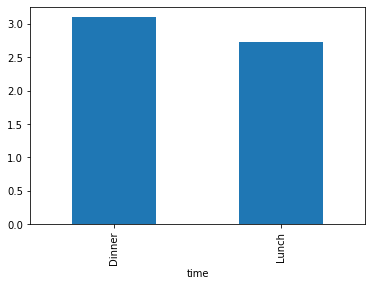

In [28]:
tips.groupby('time')['tip'].mean().plot.bar()

In [29]:
tips.groupby(['sex'])['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

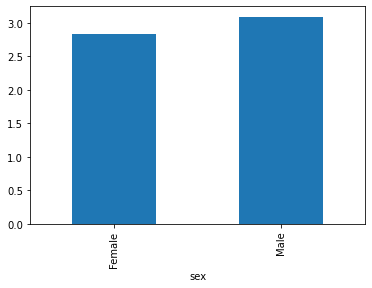

In [33]:
tips.groupby('sex')['tip'].mean().plot.bar()

In [30]:
tips.groupby(['smoker'])['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

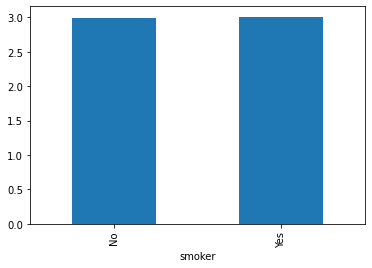

In [34]:
tips.groupby('smoker')['tip'].mean().plot.bar()

In [31]:
tips.groupby(['day'])['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

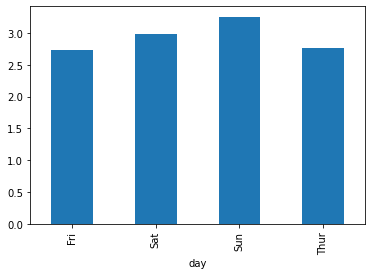

In [35]:
tips.groupby('day')['tip'].mean().plot.bar()

In [32]:
tips.groupby(['size'])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

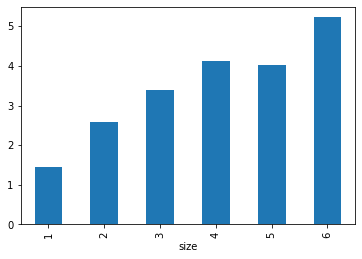

In [36]:
tips.groupby('size')['tip'].mean().plot.bar()

### let's create a cross table for smoker & tips for average tips

In [37]:
tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
No      Female    2.773519
        Male      3.113402
Yes     Female    2.931515
        Male      3.051167
Name: tip, dtype: float64

### let's put it more like a pivot structure

In [38]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


In [39]:
tips.groupby(['smoker','day'])['tip'].mean().unstack()

day,Fri,Sat,Sun,Thur
smoker,,,,
No,2.8125,3.102889,3.167895,2.673778
Yes,2.7140,2.875476,3.516842,3.030000


In [40]:
tips.groupby(['day','sex'])['tip'].mean().unstack()

sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


### Now let's create a new column to find out the % of tips compare to total bill

In [41]:
tips['tip_pct'] = tips.tip / tips.total_bill

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### let's visualize the realtionshipbetween total bill and tips

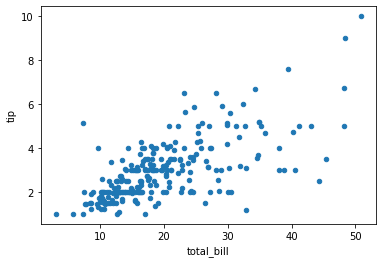

In [43]:
tips.plot.scatter(x="total_bill",y="tip")

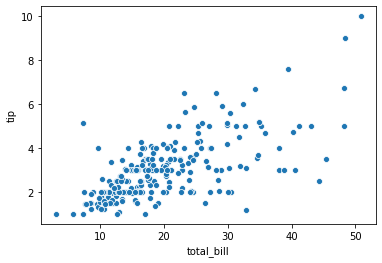

In [44]:
sns.scatterplot(x="total_bill",y='tip',data=tips)

### Let's add the the effect of column sex to understand 

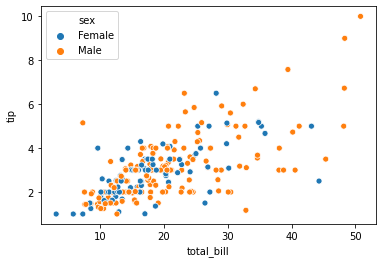

In [45]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue="sex")

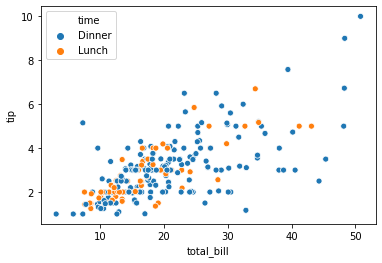

In [46]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue="time")

### Creating the Bifurcation of time on the chart above based on column sex 

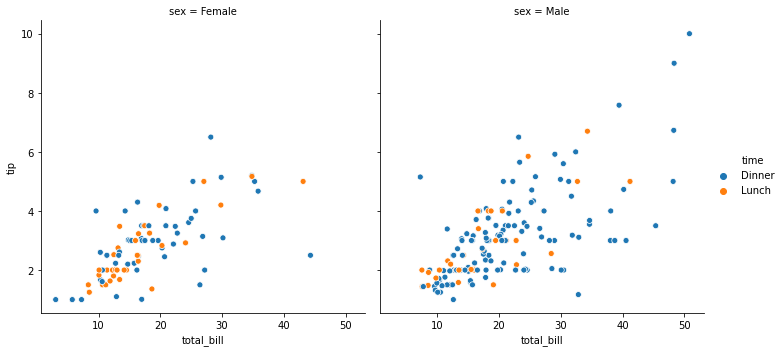

In [48]:
sns.relplot(
    x="total_bill",y="tip",data=tips,col="sex",
    hue="time"
)

### Let's look at the distribution of total bill by time

In [53]:
sns.displot(data=tips, x="total_bill",col="time",kde=True)## kde hepls to understant exact pattern of histogram

AttributeError: module 'seaborn' has no attribute 'displot'

# clearly people pay more tip during dinner

### creating corelation and distribution for all the numeric variables by sex

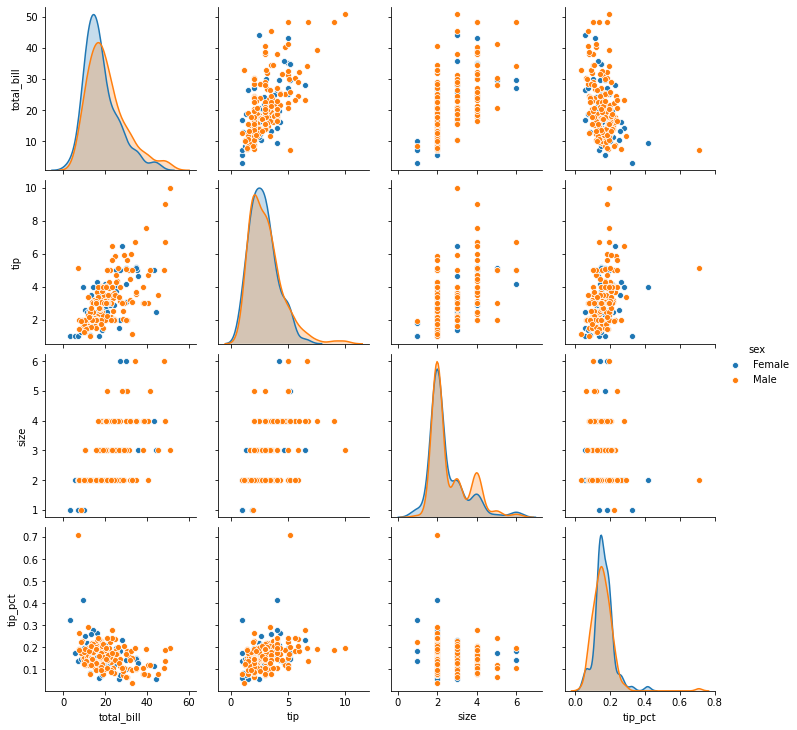

In [54]:
sns.pairplot(data=tips,hue="sex")